<a href="https://colab.research.google.com/github/gregorimaia/Engenharia_Aeroespacial/blob/main/Pendulo_Invertido_IOsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem não-linear e linearização de pêndulo invertido

Prof. Lucas Vizzotto Bellinaso
<br> 08 de dezembro de 2020
<br> Sistemas de Controle I - Engenharia Aeroespacial - UFSM


Referência do modelo de pêndulo invertido:
<br>https://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum&section=SystemModeling




In [ ]:
!pip install control
import numpy as np
from numpy import sin, cos, pi
from matplotlib import pyplot as plt
import control
from control.matlab import *

     |████████████████████████████████| 266kB 8.4MB/s 
  Created wheel for control: filename=control-0.8.4-py2.py3-none-any.whl size=276947 sha256=7e85c47068b746d3e485540a2e1de9c2e676a3822e8c2a841ad18c79e992a7fa
  Stored in directory: /root/.cache/pip/wheels/3e/a4/9a/8b6ad43fcb2aba7debf8188b60a3def7aaa9a11582b7929ead
Successfully built control


In [ ]:
def pendulo_update(t,x,u,params):
    #ref:  https://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum&section=SystemModeling
    # Parameter setup
    M = params.get('M', 0.5)
    m = params.get('m', 0.2)
    b = params.get('b', 0.1)
    L = params.get('L', 0.3)
    I = params.get('I', 0.006)    
    g = params.get('g', 9.81)    

    y, v, th, w = x[0], x[1], x[2], x[3]

    M1 = np.array([[(M+m), (m*L*cos(th))],[m*L*cos(th), I+m*L*L]])
    P = np.array([[u-b*v+m*L*w*w*sin(th)],[-m*g*L*sin(th)]])
    xdot = np.linalg.inv(M1)@P   #Equação de estado

    return [v, xdot[0], w, xdot[1]]

pendulo_sys = control.NonlinearIOSystem(pendulo_update, None,
                                        inputs=('u'), outputs=('y', 'v', 'th', 'w'),
                                        states=('y', 'v', 'th', 'w'), name='pendulum')


/usr/local/lib/python3.6/dist-packages/control/iosys.py:759: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(xdot).reshape((-1,))


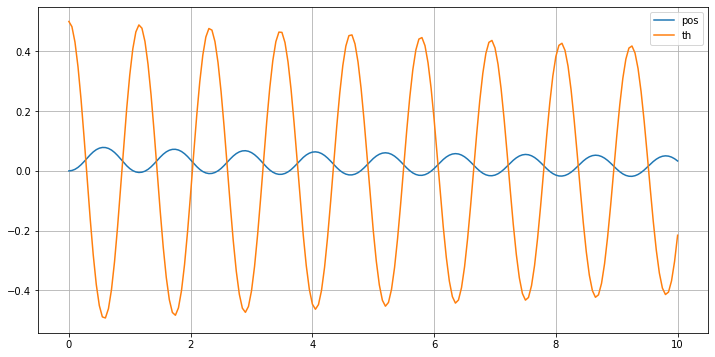

In [ ]:
X0 = [0, 0, 0.5, 0]         # Initial ('y', 'v', 'th', 'w')
tfinal = 10    #tempo final de simulação
T = np.linspace(0, tfinal, 20*tfinal+1)

# Simulate the system
t, y = control.input_output_response(pendulo_sys, T, 0, X0)

# Plot the response
plt.figure(1,figsize=(12,6),)
plt.plot(t, y[0])
plt.plot(t, y[2])
plt.grid()
plt.legend(['pos', 'th'])
plt.show(block=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.6/dist-packages/control/iosys.py:759: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(xdot).reshape((-1,))


Pêndulo linearizado:
A = 
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.81818182e-01  2.67545455e+00  1.33613316e-23]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00 -4.54545455e-01  3.12136364e+01  3.31321580e-23]] 
B = 
[[0.        ]
 [1.81818182]
 [0.        ]
 [4.54545455]]


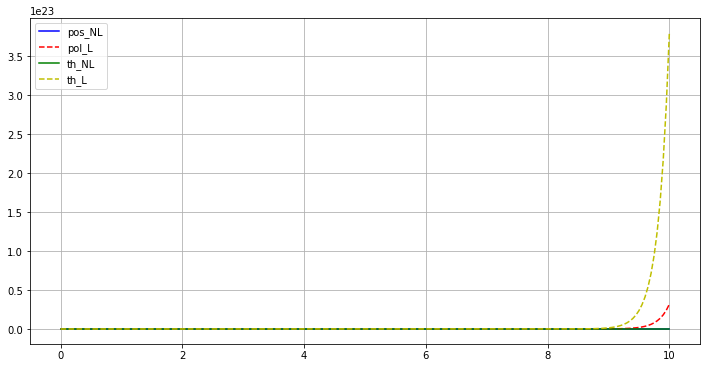

In [ ]:
#Linearização do sistema no espaço de estados

#Definição do ponto de operação de x e u
xop = [0, 0, np.pi,0];   #Ponto de operação: ['y', 'v', 'th', 'w']
uop = [0];
#Linearização:
sys_ss = control.iosys.linearize(pendulo_sys, xop, 0)
print(f'Pêndulo linearizado:\nA = \n{sys_ss.A} \nB = \n{sys_ss.B}')

# Simulação do sistema linearizado para resposta ao valor inicial:
t, ylin = control.initial_response(sys_ss,T,X0)
# Plot das respostas linear e não-linear
plt.figure(1,figsize=(12,6),)
plt.plot(t, y[0], 'b', t, ylin[0],'r--')
plt.plot(t, y[2], 'g', t, ylin[2], 'y--')
plt.grid()
plt.legend(['pos_NL', 'pol_L', 'th_NL', 'th_L'])
plt.show(block=False)